In [1]:
from importlib.metadata import version
import torch

print("TORCH VERSION :", version("torch"))
device = "cuda" if torch.cuda.is_available() else 'mps' if torch.backend.mps.is_available() else 'cpu'
print('GPU  : ', device)

TORCH VERSION : 2.2.1
GPU  :  cuda


In [2]:
import torch.nn as nn
import math

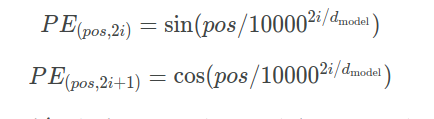

The exponential function of the natural logarithm of a number is just the number itself. 


x=exp(log(x))


exp(log(pos) - 2i/d_model.log(10000))
=>
exp(log(pos)) * exp(- 2i/d_model.log(10000))
=>
pos * exp(- 2i/d_model.log(10000)) # Ignore 2

where pos is the position and i is the dimension. That is, each dimension of the positional encoding corresponds to a sinusoid. The wavelengths form a geometric progression from 2π to 10000⋅2π. 

In addition, we apply dropout to the sums of the embeddings and the positional encodings in both the encoder and decoder stacks. For the base model, we use a rate of p_drop =0.1.



In [3]:
class PostionalEncoding(nn.Module):
    """
    Implementation of PE
    """
    def __init__(self, embedding_dim,max_len,dropout=0.1 ):
        super().__init__()

        self.dropout = nn.Dropout(dropout)
        
        pe = torch.zeros(max_len,embedding_dim)   # (max_len,embedding_dim)
        constant = math.log(10000)
        pos = torch.arange(0,max_len).unsqueeze(1)     # (max_len,1)
        # ignore multiplication with 2
        inv_den = torch.exp((torch.arange(0,embedding_dim,2,dtype=torch.float)/embedding_dim)* - constant) # (embedding_dim/2)

        pe[:,0::2] = torch.sin(pos * inv_den)   # (max_len,embedding_dim/2)
        pe[:,1::2] = torch.cos(pos * inv_den)    # (max_len,embedding_dim/2)
        pe = pe.unsqueeze(0)                    # (1,max_len,embedding_dim)
        self.register_buffer("pe", pe)

    def forward(self,x):
        # here x will be the embedding vector    # (batch,seq_len,embedding_dim)
        x  = x + self.pe[:, :x.shape[1],:].requires_grad_(False)  
        return self.dropout(x)

# NOTE :     
# register_buffer -
#     If you have parameters in your model, which should be saved and restored in the state_dict, but not trained by the optimizer, you should register them as buffers.
#     Buffers won’t be returned in model.parameters(), so that the optimizer won’t have a change to update them.  

In [29]:
# eg:  
embedding_dim,max_len = 16, 10
pe = PostionalEncoding(embedding_dim,max_len)
# inp = torch.randint(0,10,(1,max_len,embedding_dim))
inp = torch.zeros(1,max_len,embedding_dim)
result = pe(inp)

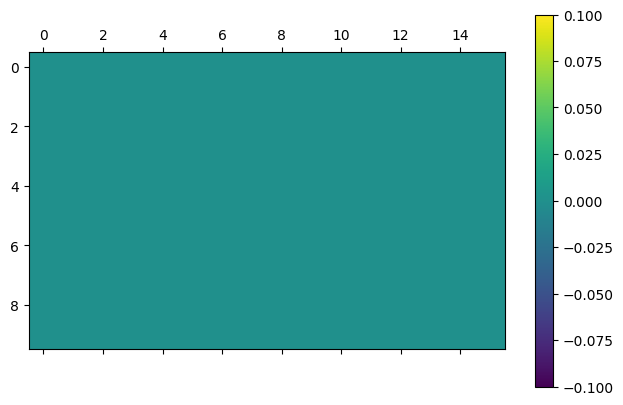

In [30]:
import matplotlib.pyplot as plt

cax = plt.matshow(inp.squeeze(0))
plt.gcf().colorbar(cax)

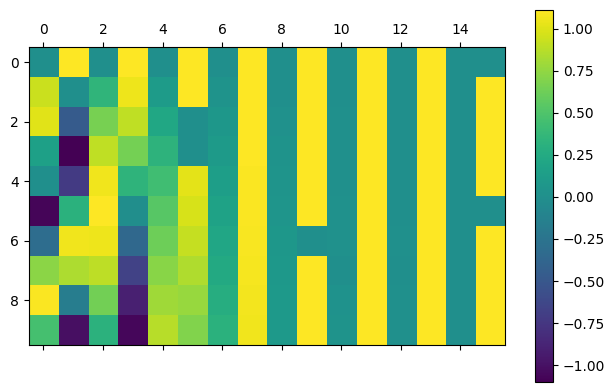

In [31]:
import matplotlib.pyplot as plt

cax = plt.matshow(result.squeeze(0))
plt.gcf().colorbar(cax)